<a href="https://colab.research.google.com/github/kiissy/machine-learning/blob/master/assignment_02_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear supervised regression
<hr>

## 0. Import library
<hr>
Import library

In [3]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1. Load dataset
<hr>
Load a set of data pairs $\{ x_i, y_i \}_{i=1}^n$ where $x$ represents label and $y$ represents target.

In [4]:
# import data with numpy
data = np.loadtxt('profit_population.txt', delimiter=',')


## 2. Explore the dataset distribution
<hr>

Plot the training data points.

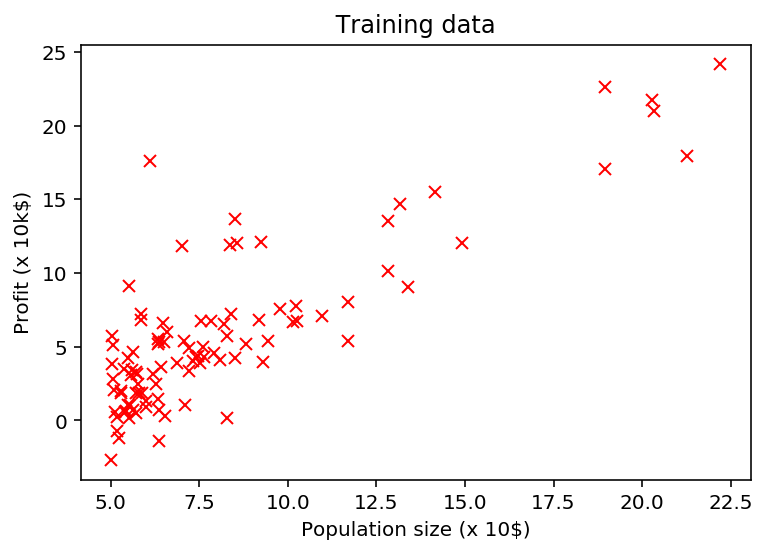

In [5]:
x_train = data[:,0]
y_train = data[:,1]

plt.title(" Training data ")
plt.xlabel("Population size (x 10$)")
plt.ylabel("Profit (x 10k$)")
plt.plot(x_train, y_train, ls="", marker="x", mec="r", mfc="r")
plt.show()

## 3. Define the linear prediction function 
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

### Vectorized implementation:
$$
f_w(x) = X w 
$$
with 
<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_1 \\ 
1 & x_2 \\ 
\vdots\\
1 & x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 
\end{array} 
\right]
\quad
\Rightarrow 
\quad
f_w(x) = X w  =
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear predictive function.

In [6]:
# construct data matrix
X = np.array([[0, 0]])
for i in range(len(x_train)):
    X = np.append(X, [[1, x_train[i]]], axis=0)
X = np.delete(X, 0, axis=0)
print(X.shape)

# parameters vector
w = np.array([1, 1])
print(w.shape)

# predictive function definition
def f_pred(X,w): 
    
    f = X @ w
    
    return f 

# Test predicitive function 
y_pred = f_pred(X,w)
print(y_pred.shape)

(97, 2)
(2,)
(97,)


## 4. Define the linear regression loss 
<hr>
$$
L(w)=\frac{1}{n} \sum_{i=1}^n \ \Big( f_w(x_i) – y_i \Big)^2
$$

### Vectorized implementation:
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
with 
$$
Xw=
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear regression loss function.

In [7]:
# loss function definition
def loss_mse(y_pred,y): 
    n = len(y)
    
    loss = (y_pred - y) @ (y_pred - y).T / n
    
    return loss


# Test loss function 
y = y_train # label 
print(y)
y_pred = f_pred(X,w)# prediction

loss = loss_mse(y_pred,y)
print(loss)

[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  3.0825  22.638   13.501    7.0467  14.692   24.147   -1.22     5.9966
 12.134    1.8495   6.5426   4.5623   4.1164   3.3928  10.117    5.4974
  0.55657  3.9115   5.3854   2.4406   6.7318   1.0463   5.1337   1.844
  8.0043   1.0179   6.7504   1.8396   4.2885   4.9981   1.4233  -1.4211
  2.4756   4.6042   3.9624   5.4141   5.1694  -0.74279 17.929   12.054
 17.054    4.8852   5.7442   7.7754   1.0173  20.992    6.6799   4.0259
  1.2784   3.3411  -2.6807   0.29678  3.8845   5.7014   6.7526   2.0576
  0.47953  0.20421  0.67861  7.5435   5.3436   4.2415   6.7981   0.92695
  0.152    2.8214   1.8451   4.2959   7.2029   1.9869   0.14454  9.0551
  0.61705]
20.53304098276701


## 5. Define the gradient of the linear regression loss 
<hr>

### Vectorized implementation: Given the loss
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
The gradient is given by  
$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(Xw-y)
$$


Implement the vectorized version of the gradient of the linear regression loss function.

In [8]:
# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(x_train)
    
    grad = X.T @ (y_pred - y) * 2 / n

    return grad


# Test grad function 
y_pred = f_pred(X,w)
grad = grad_loss(y_pred,y,X)

## 6. Implement the gradient descent algorithm 
<hr>

$\bullet$ Vectorized implementation: 
$$
w^{k+1} = w^{k} - \tau  \frac{2}{n} X^T(Xw^{k}-y)
$$

### Implement the vectorized version of the gradient descent function.

### Plot the loss values $L(w^k)$ with respect to iteration $k$ the number of iterations.

(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
Time= 0.002991914749145508
12.579082939687492
[[0.55016408 0.74638517]]
[[0.9335867  0.51530214]
 [0.94760242 0.830569  ]
 [0.90988753 0.63026924]
 [0.90561507 0.7622282 ]
 [0.87989287 0.68004482]
 [0.86809712 0.73586023]
 [0.84742843 0.70272877]
 [0.83258004 0.72691098]
 [0.81408218 0.71414584]
 [0.79803749 0.72518214]
 [0.78051262 0.7208689 ]
 [0.76404214 0.72643794]
 [0.74699224 0.72562806]
 [0.7304155  0.72891921]
 [0.71363319 0.72955737]
 [0.69708238 0.73189536]
 [0.68048104 0.73312794]
 [0.66401057 0.73506305]
 [0.64755371 0.73653556]
 [0.63118568 0.7382964 ]
 [0.61485765 0.73986165]
 [0.59860073 0.74154322]
 [0.58239453 0.74314013]
 [0.56625185 0.74478193]
 [0.55016408 0.74638517]]


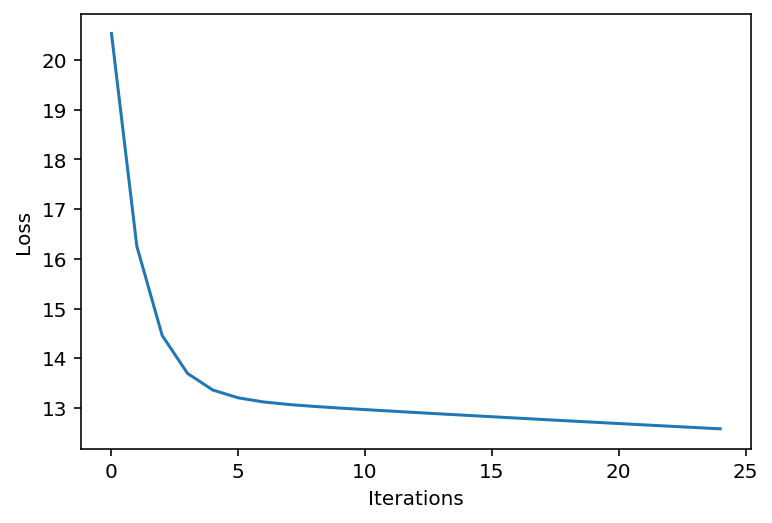

In [10]:
# gradient descent function definition
def grad_desc(X, y, w_init, tau, max_iter):

    L_iters = np.full([max_iter, 1], -1, dtype=np.float64) # record the loss values
    w_iters = np.full([max_iter, 2], -1, dtype=np.float64) # record the parameter values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X,w) # linear predicition function
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss 
        w = w - tau * grad_f # update rule of gradient descent 
        print(w.shape)
        L_iters[i] = loss_mse(y_pred,y) # save the current loss value 
        w_iters[i,:] = w # save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm 
start = time.time()
w_init = [1, 1]
tau = 0.01
max_iter = 25

w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)

print('Time=',time.time() - start) # plot the computational cost
print(L_iters[-1, 0]) # plot the last value of the loss
print(w_iters[[-1]]) # plot the last value of the parameter w
print(w_iters)

# plot
plt.figure(2)
plt.plot(L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 7. Plot the linear prediction function
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

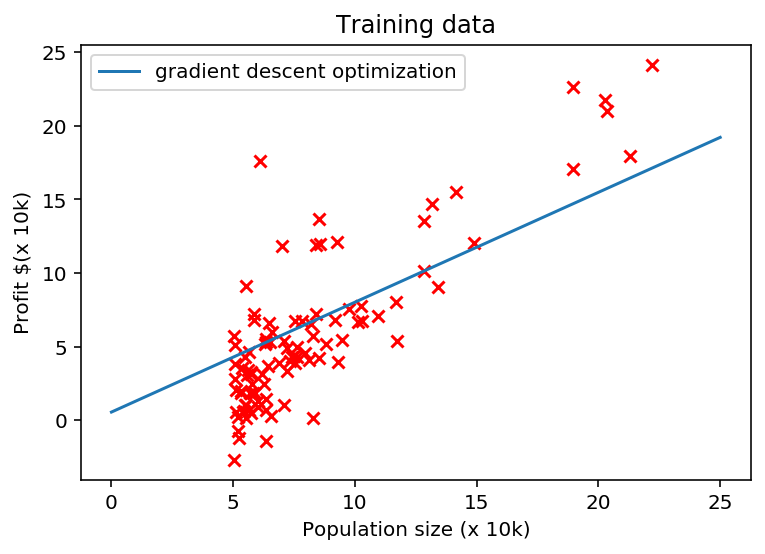

In [22]:
# linear regression model

w_0 = w_iters[(max_iter - 1), 0]
w_1 = w_iters[(max_iter - 1), 1]
x_pred = np.linspace(0,25,100) # define the domain of the prediction function
y_pred = w_0 + w_1 * x_pred # compute the prediction values within the given domain x_pred

# plot
plt.figure(3)
plt.scatter(x_train, y_train, marker="x", color="r")
plt.plot(x_pred, y_pred, label='gradient descent optimization')
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 8. Comparison with Scikit-learn linear regression algorithm
<hr>
### Compare with the Scikit-learn solution

Time= 0.010971546173095703
[[-3.89578088]
 [ 1.19303364]]
loss sklearn= [[8.95394275]]
loss gradient descent= 12.579082939687492


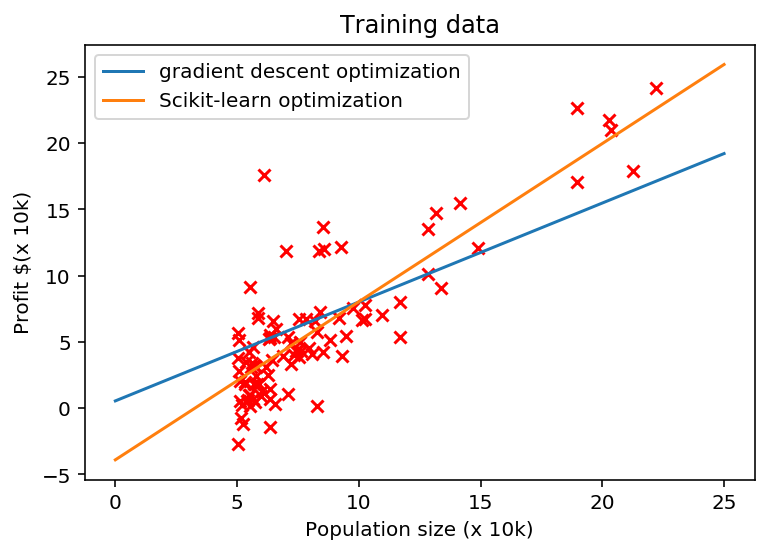

In [23]:
# run linear regression with scikit-learn
start = time.time()
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(x_train.reshape(-1, 1), y_train) # learn the model parameters
print('Time=',time.time() - start)


# compute loss value
w_sklearn = np.zeros([2,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1,0] = lin_reg_sklearn.coef_

print(w_sklearn)

y_skl_pred = f_pred(X, w_sklearn)
loss_sklearn = np.array([[loss_mse(np.ravel(y_skl_pred), y)]]) # compute the loss from the sklearn solution

print('loss sklearn=',loss_sklearn)
print('loss gradient descent=',L_iters[-1, 0]) 


# plot
x_pred_sklearn = np.linspace(0,25,100) # define the domain of the prediction function
y_pred_sklearn = w_sklearn[0,0] + w_sklearn[1,0] * x_pred_sklearn # prediction obtained by the sklearn library

plt.figure(3)

plt.scatter(x_train, y_train, marker="x", color="r")
plt.plot(x_pred, y_pred, label='gradient descent optimization')
plt.plot(x_pred_sklearn, y_pred_sklearn, label='Scikit-learn optimization')
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 9. Plot the loss surface, the contours of the loss and the gradient descent steps
<hr>

In [24]:
# plot gradient descent 
def plot_gradient_descent(X,y,w_init,tau,max_iter):
    
    def f_pred(X,w):
        
        f = X @ w
        
        return f
    
    def loss_mse(y_pred,y):
        n = len(y)
    
        loss = (y_pred - y) @ (y_pred - y).T / n
        
        return loss

    # gradient descent function definition
    def grad_desc(X, y, w_init, tau, max_iter):

        L_iters = np.full([max_iter, 1], -1, dtype=np.float64) # record the loss values
        w_iters = np.full([max_iter, 2], -1, dtype=np.float64) # record the parameter values
        w = w_init # initialization

        for i in range(max_iter): # loop over the iterations

            y_pred = f_pred(X,w) # linear predicition function
            grad_f = grad_loss(y_pred,y,X) # gradient of the loss 
            w = w - tau * grad_f # update rule of gradient descent 
            L_iters[i] = loss_mse(y_pred,y) # save the current loss value 
            w_iters[i,:] = w # save the current w value 

        return w, L_iters, w_iters

    # run gradient descent
    w, L_iters, w_iters = grad_desc(X, y, w_init, tau, max_iter)
    
    # Create grid coordinates for plotting a range of L(w0,w1)-values
    B0 = np.linspace(-10, 10, 3) # 50으로 바꿔야 함
    B1 = np.linspace(-1, 4, 3)
    
    xx, yy = np.meshgrid(B0, B1, indexing='xy')
    Z = np.zeros((B0.size,B1.size))  
    print("xx = ", xx)
    print("yy = ", yy)
    print(w, w[0], w[1])
    print("xx[0, 0] = ", xx[0,0])

    # Calculate loss values based on L(w0,w1)-values
    for (i,j),v in np.ndenumerate(Z):
        print("i, j = ", i, j)
        print("xx[i] = ", xx[i])
        print("yy[j] = ", yy[j])
        Z[i,j] = loss_mse((w[0] + w[1] * xx[i]), yy[j])
        print("Z[i,j] = ", Z[i, j])
    
    loss_sklearn = np.array([[loss_mse(np.ravel(y_skl_pred), y)]]) 

    # 3D visualization
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    # Left plot
    CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
    #ax1.scatter()
    ax1.plot(w_iters[:, 0], w_iters[:, 1])

    # Right plot
    ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
    ax2.set_zlabel('Loss $L(w_0,w_1)$')
    ax2.set_zlim(Z.min(),Z.max())

    # plot gradient descent
    Z2 = np.zeros([max_iter])
    
    for i in range(max_iter):
        w0 = 
        w1 = 
        Z2[i] = 
        
    ax2.plot( )
    ax2.scatter( )

    # settings common to both plots
    for ax in fig.axes:
        ax.set_xlabel(r'$w_0$', fontsize=17)
        ax.set_ylabel(r'$w_1$', fontsize=17)
    

xx =  [[-10.   0.  10.]
 [-10.   0.  10.]
 [-10.   0.  10.]]
yy =  [[-1.  -1.  -1. ]
 [ 1.5  1.5  1.5]
 [ 4.   4.   4. ]]
[0.55016408 0.74638517] 0.5501640776818487 0.7463851731270512
xx[0, 0] =  -10.0
i, j =  0 0
xx[i] =  [-10.   0.  10.]
yy[j] =  [-1. -1. -1.]
Z[i,j] =  39.54239711199511
i, j =  0 1
xx[i] =  [-10.   0.  10.]
yy[j] =  [1.5 1.5 1.5]
Z[i,j] =  38.041576723585855
i, j =  0 2
xx[i] =  [-10.   0.  10.]
yy[j] =  [4. 4. 4.]
Z[i,j] =  49.04075633517662
i, j =  1 0
xx[i] =  [-10.   0.  10.]
yy[j] =  [-1. -1. -1.]
Z[i,j] =  39.54239711199511
i, j =  1 1
xx[i] =  [-10.   0.  10.]
yy[j] =  [1.5 1.5 1.5]
Z[i,j] =  38.041576723585855
i, j =  1 2
xx[i] =  [-10.   0.  10.]
yy[j] =  [4. 4. 4.]
Z[i,j] =  49.04075633517662
i, j =  2 0
xx[i] =  [-10.   0.  10.]
yy[j] =  [-1. -1. -1.]
Z[i,j] =  39.54239711199511
i, j =  2 1
xx[i] =  [-10.   0.  10.]
yy[j] =  [1.5 1.5 1.5]
Z[i,j] =  38.041576723585855
i, j =  2 2
xx[i] =  [-10.   0.  10.]
yy[j] =  [4. 4. 4.]
Z[i,j] =  49.04075633517662


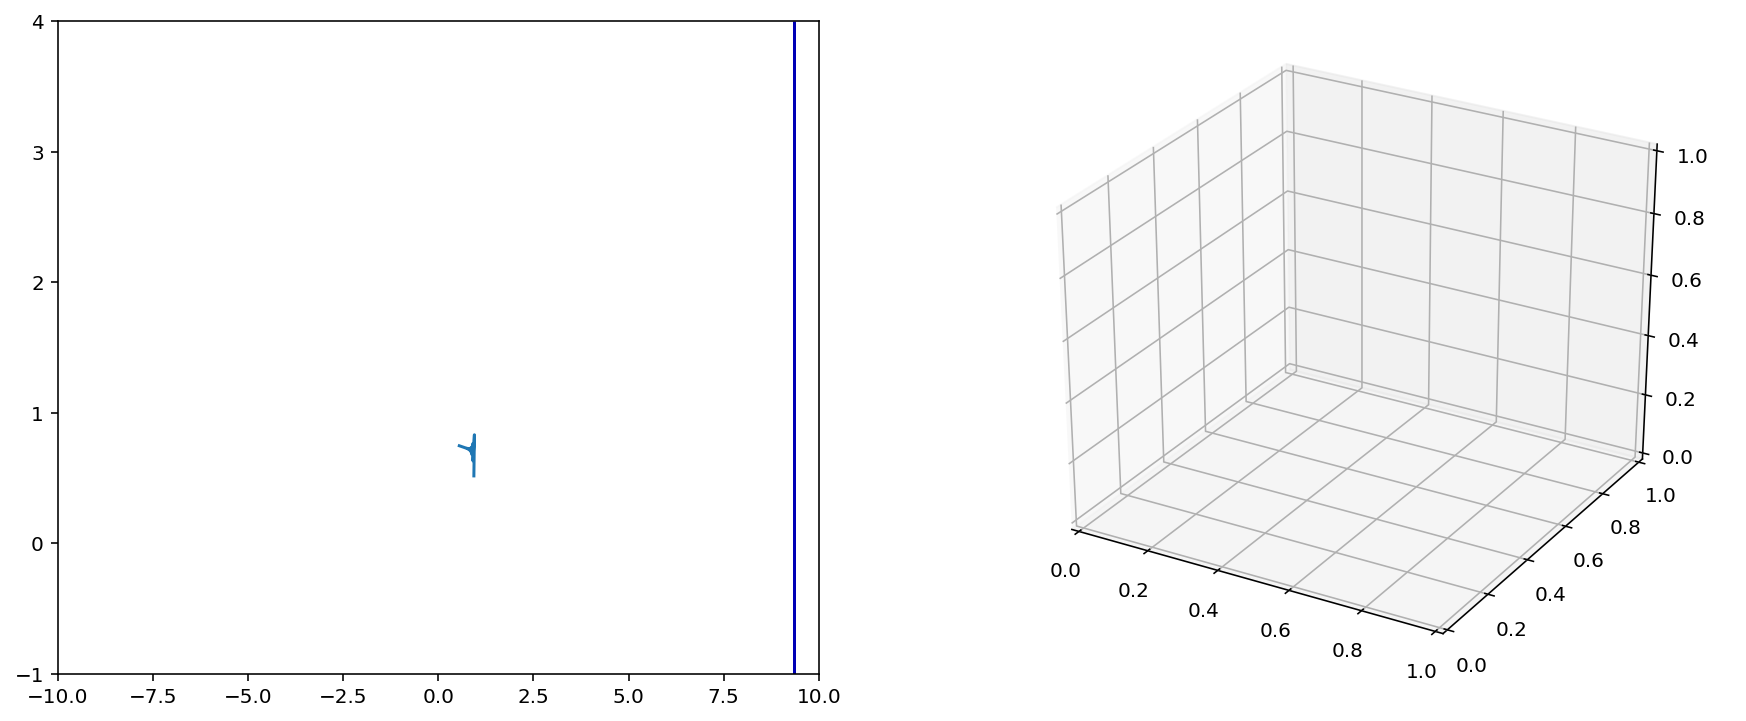

In [25]:
# run plot_gradient_descent function
w_init = [1, 1]
tau = 0.01
max_iter = 25

plot_gradient_descent(X,y,w_init,tau,max_iter) 

# Output results

## 1. Plot the training data (1pt)

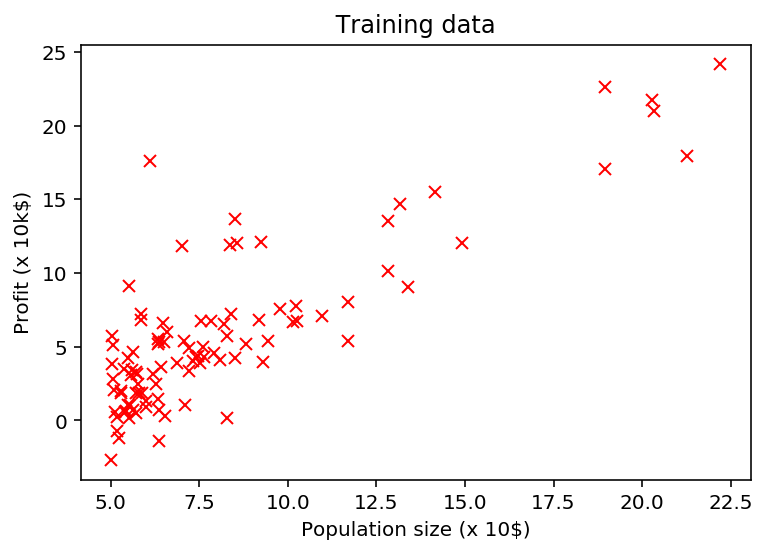

## 2. Plot the loss curve in the course of gradient descent (2pt)

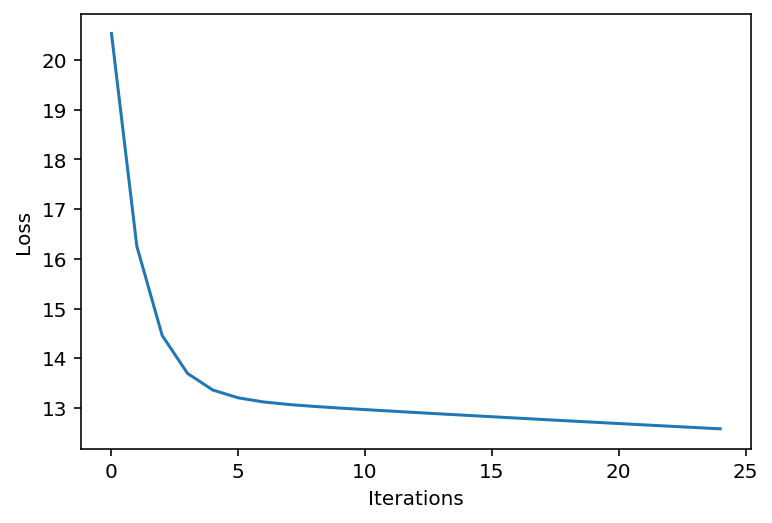

## 3. Plot the prediction function superimposed on the training data (2pt)

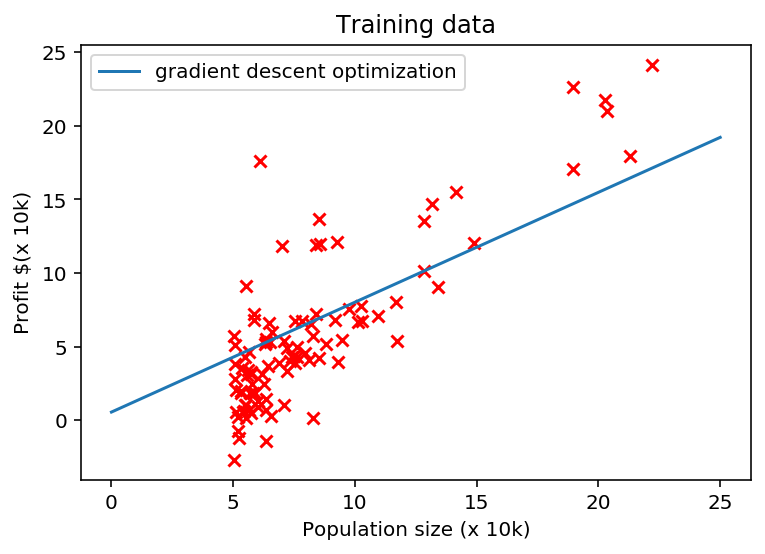

## 4. Plot the prediction functions obtained by both the Scikit-learn linear regression solution and the gradient descent superimposed on the training data (2pt)

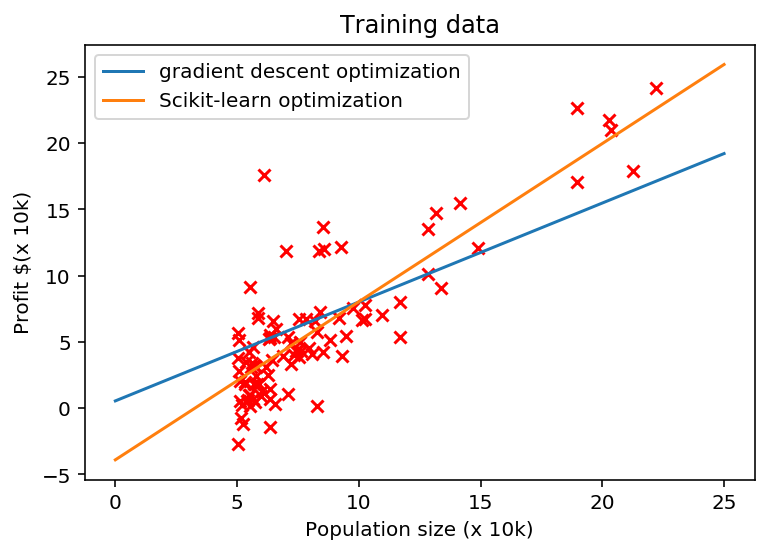

## 5. Plot the loss surface (right) and the path of the gradient descent (2pt)

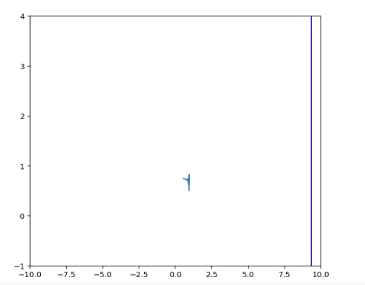

## 6. Plot the contour of the loss surface (left) and the path of the gradient descent (2pt)

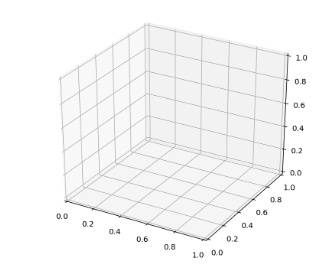